In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
import librosa
import librosa.display
import IPython.display as IPD
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,LSTM


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
datapath='/content/drive/My Drive/data/genres'

In [ ]:
y,sr=librosa.load('/content/drive/My Drive/data/genres/rock.00099.wav',sr=22050)

In [ ]:
spect.shape

NameError: ignored

In [ ]:
IPD.Audio('/content/drive/My Drive/data/genres/rock.00099.wav')

In [ ]:
y.shape

In [ ]:
sr

22050

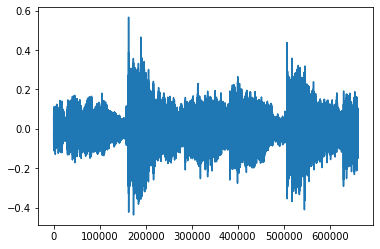

In [ ]:
plt.plot(y)

In [ ]:
D = librosa.stft(y)  # STFT of y
Y=np.abs(D**2)


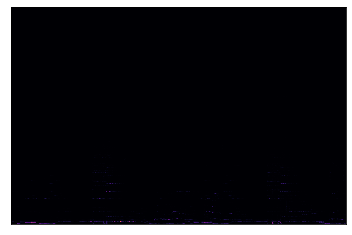

In [ ]:

librosa.display.specshow(Y)      

In [ ]:
def draw_spectogram(Y,sr,hop_length=512,y_axis='linear'):
  plt.figure(figsize=(8,6))
  librosa.display.specshow(data=Y,hop_length=hop_length,y_axis=y_axis,x_axis='time')
  plt.colorbar(format='%3.0f ')
  plt.title("Power Spectrogram")
  plt.show()

In [ ]:
D = librosa.stft(y)  # STFT of y
Y=np.abs(D)

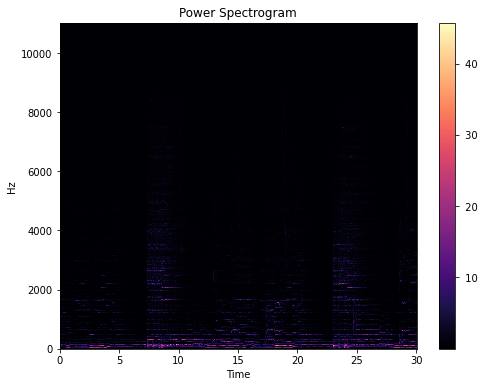

In [ ]:
draw_spectogram(Y,sr,hop_length=512,y_axis='linear')

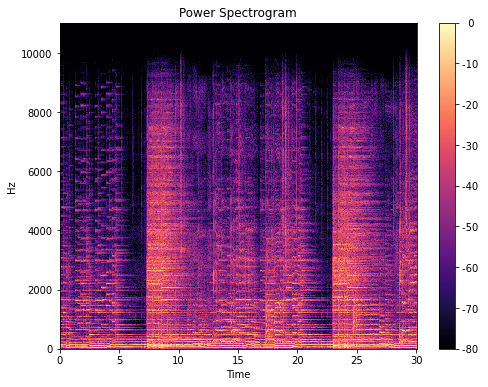

In [ ]:
Y_db=librosa.power_to_db(Y**2, ref=np.max )
draw_spectogram(Y_db,sr,hop_length=512,y_axis='linear')

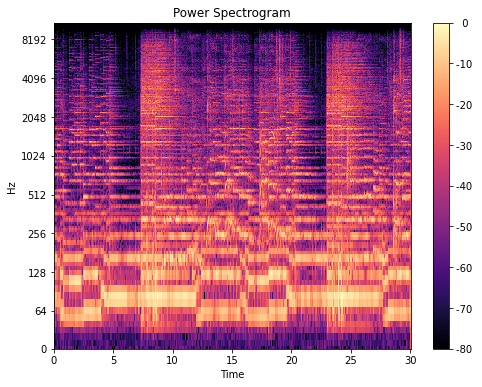

In [ ]:
Y_db=librosa.power_to_db(Y**2, ref=np.max)
draw_spectogram(Y_db,sr,hop_length=512,y_axis='log')

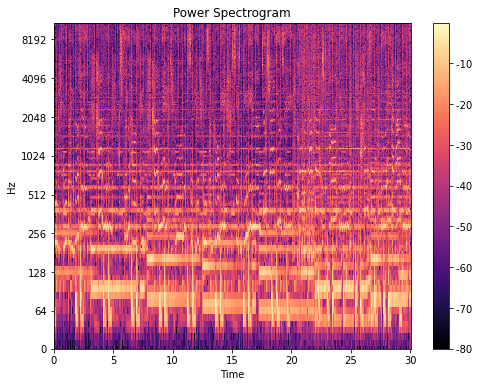

In [ ]:
y,sr=librosa.load('/content/drive/My Drive/data/genres/pop.00090.wav',sr=22050)
Y_db=librosa.power_to_db((np.abs(librosa.stft(y)))**2, ref=np.max)
draw_spectogram(Y_db,sr,hop_length=512,y_axis='log')


In [ ]:
spect = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=1028)


In [ ]:
spect.shape

(128, 644)

In [ ]:
spect.shape

(128, 644)

In [ ]:
def make_spectrograms(path):
  mel_spectograms=[]
  labels=[]

  for file in os.scandir(path):

    y,sr=librosa.core.load(file)
    spectogram= librosa.feature.melspectrogram(y=y, sr=sr,hop_length=1024)
    spectogram = librosa.power_to_db(spectogram, ref=np.max)

    if spectogram.shape[1]!=660:
       spectogram.resize(128,660, refcheck=False)
    
    label = str(file).split('.')[0][11:]


    mel_spectograms.append(spectogram)
    labels.append(label)

    X=np.array(mel_spectograms)

  return X,labels



    
    




In [ ]:
X,y=make_spectrograms('/content/drive/My Drive/data/genres')

In [ ]:
X.shape

(1000, 128, 660)

In [ ]:
Y=np.array(y)
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(Y.reshape(-1,1))

In [ ]:
onehot_encoded.shape

(1000, 10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,onehot_encoded, random_state=42, stratify=onehot_encoded, test_size=.20)

In [ ]:
X_train /= -80
X_test /= -80


In [ ]:
X_train.shape

(800, 128, 660)

In [ ]:
np.random.seed(23456)

In [ ]:
X_train=X_train.reshape(X_train.shape[0],128,660,1)
X_test=X_test.reshape(X_test.shape[0],128,660,1)

In [ ]:
model=Sequential()
model.add(Flatten(input_shape = (128, 660, 1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
training=model.fit(X_train,y_train,batch_size=16,epochs=40,validation_data=(X_test, y_test))

Epoch 1/40
50/50 [==============================] - 1s 11ms/step - loss: 11.6349 - accuracy: 0.1147 - val_loss: 4.3267 - val_accuracy: 0.1000
Epoch 2/40
50/50 [==============================] - 0s 8ms/step - loss: 3.2237 - accuracy: 0.1178 - val_loss: 2.6569 - val_accuracy: 0.1650
Epoch 3/40
50/50 [==============================] - 0s 8ms/step - loss: 2.4817 - accuracy: 0.1752 - val_loss: 2.2305 - val_accuracy: 0.1350
Epoch 4/40
50/50 [==============================] - 0s 8ms/step - loss: 2.3050 - accuracy: 0.2097 - val_loss: 2.1588 - val_accuracy: 0.2000
Epoch 5/40
50/50 [==============================] - 0s 8ms/step - loss: 2.0218 - accuracy: 0.2838 - val_loss: 2.0126 - val_accuracy: 0.2450
Epoch 6/40
50/50 [==============================] - 0s 7ms/step - loss: 1.9988 - accuracy: 0.3128 - val_loss: 2.0898 - val_accuracy: 0.2150
Epoch 7/40
50/50 [==============================] - 0s 7ms/step - loss: 1.9878 - accuracy: 0.3147 - val_loss: 1.8705 - val_accuracy: 0.3000
Epoch 8/40
50/50 [

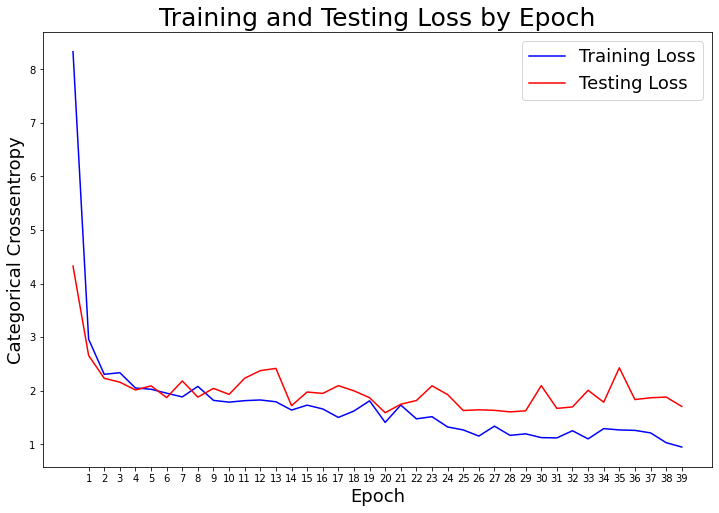

In [ ]:
train_loss = training.history['loss']
test_loss =training.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,40), range(1,40))

plt.legend(fontsize = 18);

In [ ]:
model2=Sequential()

model2.add(Conv2D(filters=16,kernel_size=(3,3), activation='relu',input_shape=(128,660,1),padding='same'))
model2.add(MaxPooling2D(pool_size=(2,4)))

model2.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2,4)))

model2.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(pool_size=(2,4)))
model2.add(keras.layers.Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))
# Adding a dropout layer for regularization
model2.add(keras.layers.Dropout(0.25))
# Adding an output layer
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 128, 660, 16)      160       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 64, 165, 16)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 64, 165, 32)       4640      
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 32, 41, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 32, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 16, 10, 64)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 16, 10, 64)      

In [ ]:
model2.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Fitting our neural network
history = model2.fit(X_train,
                        y_train, 
                        batch_size=16,
                        validation_data=(X_test, y_test),
                        epochs=40)

Epoch 1/40
50/50 [==============================] - 2s 22ms/step - loss: 2.3203 - accuracy: 0.1068 - val_loss: 2.2965 - val_accuracy: 0.1050
Epoch 2/40
50/50 [==============================] - 1s 18ms/step - loss: 2.2937 - accuracy: 0.1432 - val_loss: 2.2093 - val_accuracy: 0.2450
Epoch 3/40
50/50 [==============================] - 1s 18ms/step - loss: 2.1754 - accuracy: 0.2180 - val_loss: 1.9939 - val_accuracy: 0.2650
Epoch 4/40
50/50 [==============================] - 1s 18ms/step - loss: 1.9517 - accuracy: 0.2933 - val_loss: 1.7719 - val_accuracy: 0.3150
Epoch 5/40
50/50 [==============================] - 1s 18ms/step - loss: 1.7273 - accuracy: 0.3749 - val_loss: 1.5266 - val_accuracy: 0.4400
Epoch 6/40
50/50 [==============================] - 1s 17ms/step - loss: 1.5601 - accuracy: 0.4138 - val_loss: 1.3978 - val_accuracy: 0.5300
Epoch 7/40
50/50 [==============================] - 1s 18ms/step - loss: 1.4056 - accuracy: 0.4923 - val_loss: 1.3931 - val_accuracy: 0.5900
Epoch 8/40
50

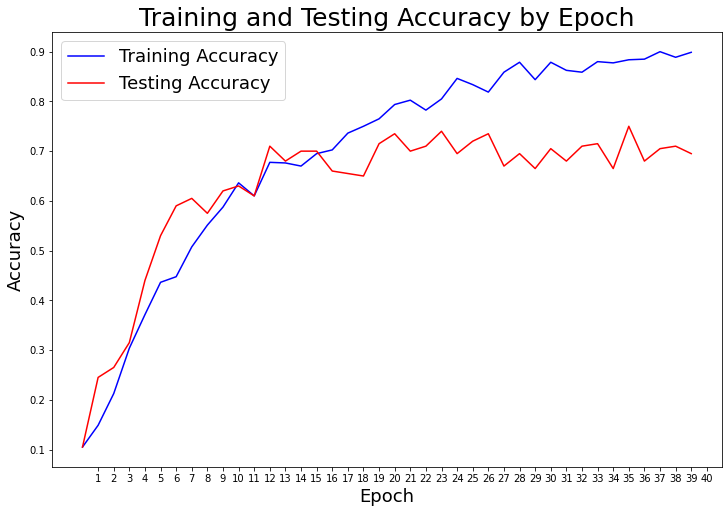

In [ ]:
train_accuracy = history.history['accuracy']
test_accuracy =history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(test_accuracy, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,41), range(1,41))

plt.legend(fontsize = 18);

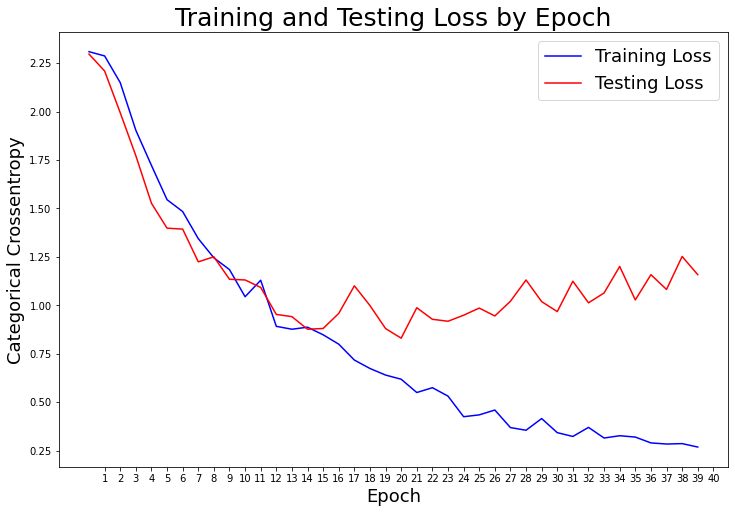

In [ ]:

train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,41), range(1,41))

plt.legend(fontsize = 18);